# Shiladitya 2348556 🙃

# Q1

In [34]:
def f(x):
    return x**3 - 20*(x**2) + 100*x - 200
def gradient(x):
    return 3*(x**2) - 40*x + 100
def fun(lr, momentum, num_iter):
    x = 5
    v = 0
    for i in range(num_iter):
        grad = gradient(x)
        v = momentum * v + lr * grad
        x = x - v
        if i % 100 == 0:
            print(f"Iteration {i}: x = {x}, f(x) = {f(x)}")    
    return x

lr = 0.05
momentum = 0.9
num_iter = 801
optimal_x = fun(lr, momentum, num_iter)
print(f"\nFinally x = {optimal_x}, f(x) = {f(optimal_x)}")


Iteration 0: x = 6.25, f(x) = -112.109375
Iteration 100: x = 9.9812354536791, f(x) = -199.9964855251643
Iteration 200: x = 9.999950872236253, f(x) = -199.99999997586474
Iteration 300: x = 10.000000161511458, f(x) = -199.99999999999977
Iteration 400: x = 10.000000002411246, f(x) = -200.0000000000001
Iteration 500: x = 10.000000000012225, f(x) = -200.0
Iteration 600: x = 10.000000000000023, f(x) = -200.0000000000001
Iteration 700: x = 10.0, f(x) = -200.0
Iteration 800: x = 10.0, f(x) = -200.0

Finally x = 10.0, f(x) = -200.0


#### Note that the function has been checked for local minimum in copy. It is an asymptotically decreasing function to the negative side of the dependent axis and where the local minimum occurs at point `(10, -200)`. Our code gives the same result via gradient descent with momentum.

#### We will show the convergence for the first 3 iterations also...

In [26]:
def f(x):
    return x**3 - 20*(x**2) + 100*x - 200
def gradient(x):
    return 3*(x**2) - 40*x + 100
def fun(lr, momentum):
    x = 5
    v = 0
    for i in range(3):
        grad = gradient(x)
        v = momentum * v + lr * grad
        x = x - v
        print(f"Iteration {i+1}: x = {x:.2f}, f(x) = {f(x):.2f}")    
    return x

lr = 0.05
momentum = 0.9
optimal_x = fun(lr, momentum)
print(f"\nFinally x = {optimal_x:.2f}, f(x) = {f(optimal_x):.2f}")


Iteration 1: x = 6.25, f(x) = -112.11
Iteration 2: x = 9.02, f(x) = -191.26
Iteration 3: x = 12.34, f(x) = -132.20

Finally x = 12.34, f(x) = -132.20


# Q2

#### Implemented using PyTorch.

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
input_dim = 20
num_samples = 1000
x_train = torch.rand(num_samples, input_dim)
y_train = torch.randint(0, 2, (num_samples,))

class MLP(nn.Module):
    def __init__(shila, activation):
        super(MLP, shila).__init__()
        shila.fc1 = nn.Linear(input_dim, 64)
        shila.fc2 = nn.Linear(64, 32)
        shila.fc3 = nn.Linear(32, 1)
        shila.activation = activation
    def forward(shila, x):
        x = shila.activation(shila.fc1(x))
        x = shila.activation(shila.fc2(x))
        x = torch.sigmoid(shila.fc3(x))
        return x
    
sigmoid_model = MLP(nn.Sigmoid())
relu_model = MLP(nn.ReLU())
leaky_sigmoid = MLP(nn.Sequential(nn.LeakyReLU(), nn.Sigmoid()))
batch_size = 32
num_epochs = 20
criterion = nn.BCELoss()
op_sigmoid = optim.Adam(sigmoid_model.parameters())
op_relu = optim.Adam(relu_model.parameters())
op_leaky_sigmoid = optim.Adam(leaky_sigmoid.parameters())

def train_model(model, optimizer):
    pl = []
    for _ in range(num_epochs):
        for i in range(0, num_samples, batch_size):
            batch_X = x_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size].float().view(-1, 1)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            pl.append(loss.item())
            loss.backward()
            optimizer.step()
    return pl

sigpl = train_model(sigmoid_model, op_sigmoid)
relupl = train_model(relu_model, op_relu)
leakysigpl = train_model(leaky_sigmoid, op_leaky_sigmoid)

def evaluate_model(model, name):
    outputs = model(x_train)
    predicted_labels = (outputs > 0.5).float().view(-1)
    accuracy = (predicted_labels == y_train).float().mean().item()
    print(f"{name} Model: {accuracy*100:.2f}%")

print("\nEvaluation Results (Accuracy):")
evaluate_model(sigmoid_model, "Sigmoid")
evaluate_model(relu_model, "ReLU")
evaluate_model(leaky_sigmoid, "LeakyReLU + Sigmoid")



Evaluation Results (Accuracy):
Sigmoid Model: 54.90%
ReLU Model: 61.10%
LeakyReLU + Sigmoid Model: 54.50%


#### Note that the accuracy of ~50% is explained by the fact that the data is randomly generated. It is simple probability on binary classification that tells us that there is a 50% chance to hit or miss on random prediction.

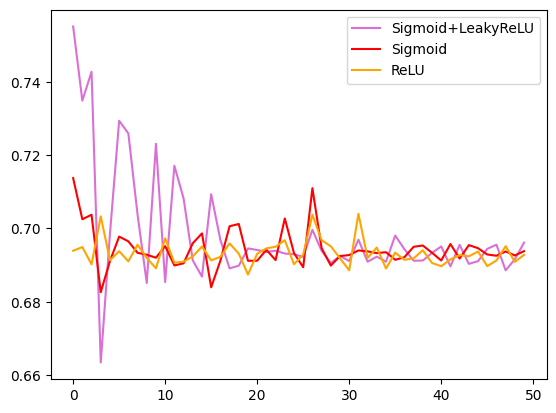

In [61]:
import matplotlib.pyplot as pt
pt.plot(leakysigpl[:50], color='orchid')
pt.plot(sigpl[:50], color='red')
pt.plot(relupl[:50], color='orange')
pt.legend(['Sigmoid+LeakyReLU','Sigmoid','ReLU']);

# Q3

In [11]:
import numpy as np

def f(x, y):
    return x**2 + y**2

num_samples = 1000
x_data = np.random.uniform(-10, 10, num_samples)
y_data = np.random.uniform(-10, 10, num_samples)

batch_size = 10
num_iter = 100
lr = 0.05

x = 0
y = 0

for i in range(num_iter):
    indc = np.random.permutation(num_samples)
    x_shuff = x_data[indc]
    y_shuff = y_data[indc]
    for j in range(0, num_samples, batch_size):
        x_batch = x_shuff[j:j+batch_size]
        y_batch = y_shuff[j:j+batch_size]
        grad_x = np.mean(2 * x_batch)
        grad_y = np.mean(2 * y_batch)
        x = x - lr * grad_x
        y = y - lr * grad_y

print(f"Final value of x: {x:.4f}")
print(f"Final value of y: {y:.4f}")

Final value of x: 96.6113
Final value of y: 64.0472


# Q4

In [64]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

in_size = 2
hide_size = 2
out_size = 1

w1 = np.random.randn(hide_size, in_size)
b1 = np.random.randn(hide_size, 1)
w2 = np.random.randn(out_size, hide_size)
b2 = np.random.randn(out_size, 1)

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

lr = 0.1
num_epochs = 10000
pl = []
for epoch in range(num_epochs):
    Z1 = np.dot(w1, x.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(w2, A1) + b2
    A2 = sigmoid(Z2)
    loss = np.mean((A2 - y.T) ** 2)
    pl.append(loss)
    dZ2 = A2 - y.T
    dW2 = np.dot(dZ2, A1.T) / x.shape[0]
    db2 = np.sum(dZ2, axis=1, keepdims=True) / x.shape[0]    
    dA1 = np.dot(w2.T, dZ2)
    dZ1 = dA1 * dsigmoid(Z1)
    dW1 = np.dot(dZ1, x) / x.shape[0]
    db1 = np.sum(dZ1, axis=1, keepdims=True) / x.shape[0]
    w2 -= lr * dW2
    b2 -= lr * db2
    w1 -= lr * dW1
    b1 -= lr * db1
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Z1 = np.dot(w1, x.T) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(w2, A1) + b2
A2 = sigmoid(Z2)

print("Final Predictions:")
for i in range(x.shape[0]):
    print(f"Input: {x[i]}, Predicted Output: {int(np.round(A2[0][i]))}")


Epoch 0, Loss: 0.3257
Epoch 1000, Loss: 0.2493
Epoch 2000, Loss: 0.2473
Epoch 3000, Loss: 0.2408
Epoch 4000, Loss: 0.2222
Epoch 5000, Loss: 0.1980
Epoch 6000, Loss: 0.1456
Epoch 7000, Loss: 0.0351
Epoch 8000, Loss: 0.0112
Epoch 9000, Loss: 0.0051
Final Predictions:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


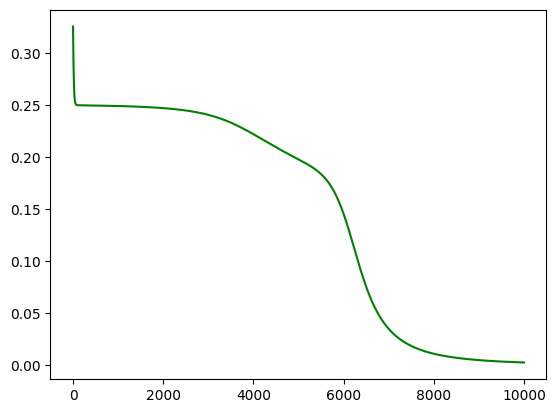

In [68]:
pt.plot(pl, color='green');

#### So, MLP can handle non-linear inputs.

In [22]:
print("The total number of parameters in the given network is: 1048992.")

The total number of parameters in the given network is: 1048992.


#### Note that the calculations are done in copy.